In [1]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

c:\Users\DELL\VENV\geo\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
url = "https://www.mise.gov.it/images/exportCSV/prezzo_alle_8.csv"
df_prezzi = pd.read_csv(url, delimiter=';', skiprows=1)
df_prezzi.head(2)

idImpianto descCarburante  prezzo  isSelf               dtComu
0        6492    Hi-Q Diesel   1.644       1  11/10/2021 17:33:16
1        6612    Hi-Q Diesel   1.669       1  13/10/2021 01:11:44

In [3]:
df_prezzi = df_prezzi.loc[:, ['idImpianto', 'descCarburante', 'prezzo']]
df_prezzi.columns = ['id', 'gasoline_type','price']

In [2]:
url_impianti = "https://www.mise.gov.it/images/exportCSV/anagrafica_impianti_attivi.csv"
df_impianti = pd.read_csv(url_impianti, delimiter=';', skiprows=1)

In [3]:
geo_stations = gpd.GeoDataFrame(
    df_impianti,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(df_impianti.Longitudine, df_impianti.Latitudine))

In [4]:
# Keeping only usefull columns
geo_stations = geo_stations.loc[:, ['idImpianto', 'Gestore','Bandiera', 'Nome Impianto','Indirizzo', 'Comune', 'geometry']]

## Retriving only valid geometry
geo_stations= geo_stations.loc[geo_stations.geometry.is_valid,:]
geo_stations.rename(columns={'idImpianto': 'id'}, inplace=True)
# geo_stations.to_file('impianti.geojson', driver='GeoJSON')  

In [7]:
# url = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg'
# macroregions = gpd.read_file(url,layer="macroregions")
# fix, axes= plt.subplots(1,1, figsize=(20,20))

# plt.title('Italian Station Available')

# macroregions.to_crs(epsg=4326).plot(ax=axes, color='lightblue', edgecolor='black', alpha=0.5)
# geo_stations.plot(ax=axes,
#                     color='royalblue',
#                     markersize= 1.4
#                     )

# plt.axis('off')
# plt.savefig('italian-station.png', dpi=300)
# plt.show()

In [53]:
macroregions.to_file('municipalities.geojson', driver='GeoJSON')

In [79]:
import json
comune = 'Bergamo'
with open(f"./../data/prices_for_municipality/{comune.lower()}.json", 'r') as f:
    result = json.load(f)

In [80]:
result['Benzina']['3']['multipolygon']

[]

In [77]:
url = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg'
macroregions = gpd.read_file(url,layer="municipalities")
medo = macroregions.loc[macroregions.COMUNE == 'Bergamo']

In [78]:
area = result['Benzina']['5']['multipolygon']
prices = result['Benzina']['3']['price']

In [43]:
area
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import Point
from shapely.geometry import shape
Multi = MultiPolygon([shape(area)])

In [81]:
res = []
for stat in prices[0:5]:
    stat['geometry'] = Point(shape(stat['geometry']))
    res.append(stat)


In [82]:
medo_geo = gpd.GeoDataFrame(res)
buffer_medo = gpd.GeoDataFrame({'geometry' :Multi})

In [83]:
medo_geo['color'] =['darkgreen','yellow','red','grey','grey']

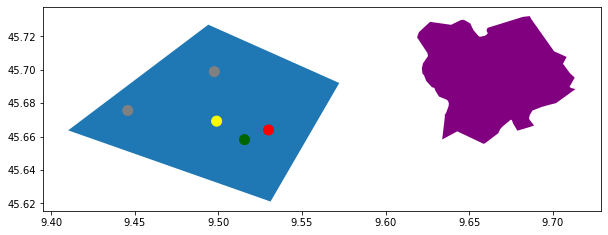

In [84]:
fig, axes = plt.subplots(1,1, figsize=(10,10))


buffer_medo.plot(ax=axes)
medo.to_crs(epsg=4326).plot(ax=axes, color='purple')
medo_geo.plot(ax=axes, color=medo_geo.color, markersize=100)

plt.show()

AttributeError: 'str' object has no attribute 'reverse'